In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from Bio.Cluster import distancematrix

# Read in excel file

In [2]:
df = pd.ExcelFile(r'../Data/raw_data/41467_2019_13483_MOESM4_ESM.xlsx')

***Read in sheets from excel file***

In [3]:
exp_data = df.parse('Expression Data', index_col='log-TPM')
metadata = df.parse('Metadata')

In [4]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [5]:
metadata.head()

,Sample ID,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
0,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
1,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
2,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
3,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
4,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900


***Remove all Sample IDs that contain no growth rate information***

In [6]:
metadata_clean = metadata.dropna(subset=['Growth Rate (1/hr)'])
metadata_clean = metadata_clean[metadata_clean['Growth Rate (1/hr)'] != 0]

In [113]:
metadata_clean.shape

(173, 26)

# Determining distribution of different variables

<AxesSubplot:ylabel='Frequency'>

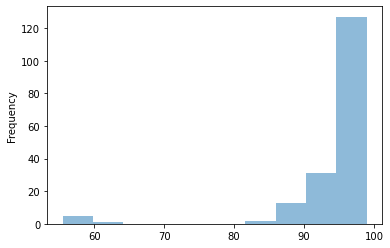

In [9]:
metadata_clean['Alignment'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

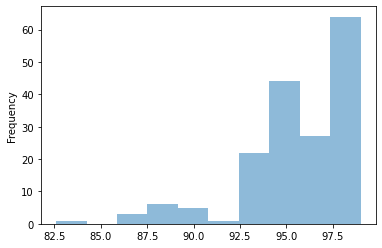

In [10]:
#Remove all Sample IDs where the alignment is less than 80%
metadata_clean = metadata_clean[metadata_clean['Alignment'] > 80]
metadata_clean['Alignment'].plot.hist(alpha=0.5)

In [114]:
metadata_clean.shape

(173, 26)

<AxesSubplot:ylabel='Frequency'>

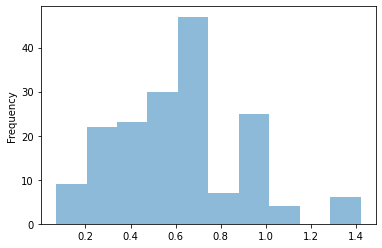

In [12]:
metadata_clean['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

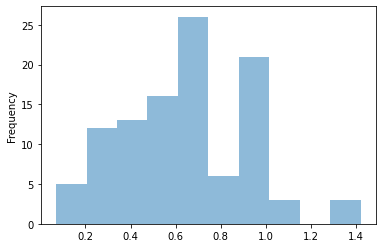

In [13]:
metadata_clean[metadata_clean['Replicate #'] == 1]['Growth Rate (1/hr)'].plot.hist(alpha=0.5)

In [14]:
#Count the number of strains to determine low counts
metadata_clean['Strain'].value_counts()

MG1655     151
BW25113     22
Name: Strain, dtype: int64

***Remove all columns (Sample IDs) in expression dataset if there was no growth rate information found***

In [15]:
exp_data.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [18]:
exp_data_clean = exp_data[metadata_clean['Sample ID']]
assert list(metadata_clean['Sample ID']) == list(exp_data_clean.columns)

In [19]:
exp_data_clean.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.064810,10.779071,11.229767,11.214065,9.257348,9.182322,9.709213,9.672126,10.208587,10.218351,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.776984,10.597810,10.897938,10.861157,8.983408,8.943151,9.436004,9.394573,9.609637,9.677931,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.394971,10.113950,10.185151,10.164655,8.761690,8.779920,9.532673,9.534370,9.883558,9.870356,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.716069,6.410864,6.527653,6.136168,4.474204,4.720490,5.782102,5.326669,5.846675,5.972022,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.761813,6.816532,6.862147,6.817480,6.536457,6.439917,6.408731,6.276017,6.910200,6.843384,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


# Summary statistics of gene expression

<AxesSubplot:ylabel='Frequency'>

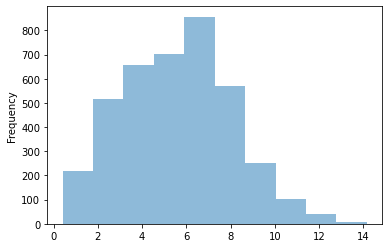

In [20]:
#Mean of expression data for each gene
exp_data_clean.mean(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

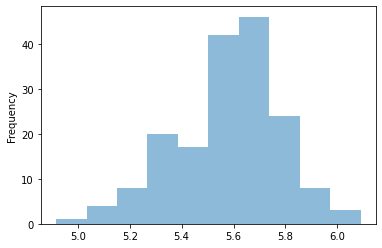

In [21]:
exp_data_clean.mean(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

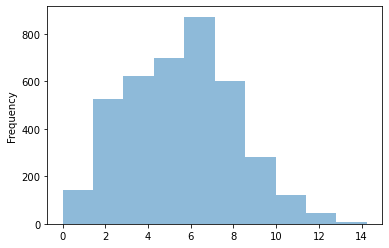

In [22]:
#Median of expression data for each gene
exp_data_clean.median(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

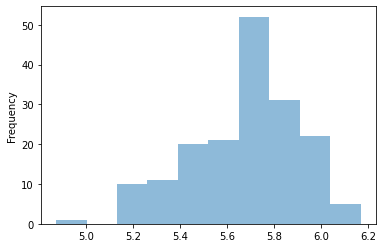

In [23]:
exp_data_clean.median(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

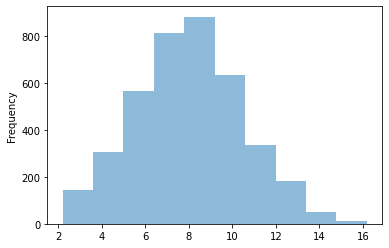

In [24]:
#Max of expression data for each gene
exp_data_clean.max(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

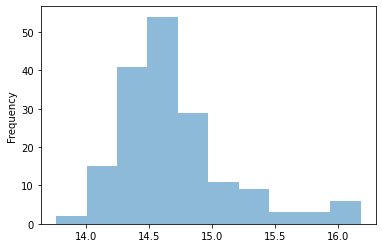

In [25]:
exp_data_clean.max(axis='rows').plot.hist(alpha=0.5)

***Variance***

<AxesSubplot:ylabel='Frequency'>

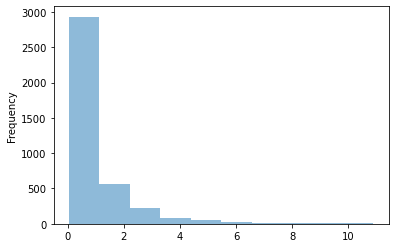

In [26]:
#Variance of expression data for each gene
exp_data_clean.var(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

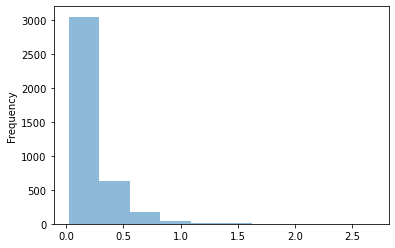

In [27]:
(exp_data_clean.std(axis='columns') / exp_data_clean.mean(axis='columns')).plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

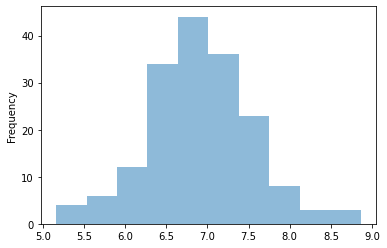

In [28]:
exp_data_clean.var(axis='rows').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

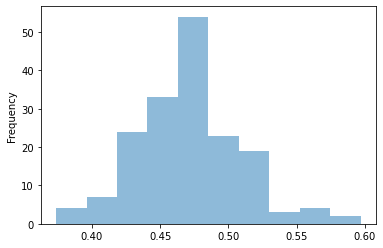

In [29]:
(exp_data_clean.std(axis='rows') / exp_data_clean.mean(axis='rows')).plot.hist(alpha=0.5)

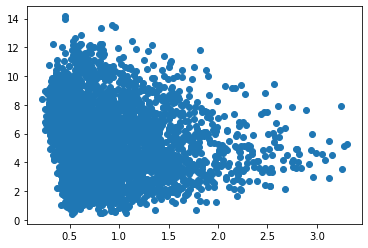

In [30]:
#Look at correlation between std and average gene expression
x_data = exp_data_clean.std(axis='columns')
y_data = exp_data_clean.mean(axis='columns')

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)

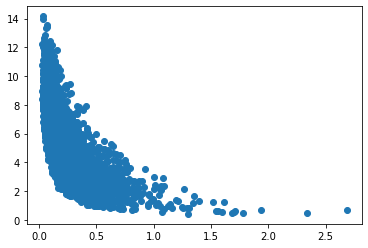

In [31]:
fig, ax = plt.subplots()
ax.scatter(x_data/y_data, y_data)

In [32]:
#Check if there are any NaN values for each gene
exp_data_clean[exp_data_clean.isnull().sum(axis='columns') != 0]

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,


In [115]:
exp_data_clean.shape

(3923, 173)

<AxesSubplot:ylabel='Frequency'>

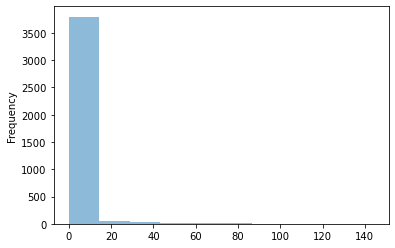

In [34]:
#Determine no expression for each gene per condition. Should we remove any?
exp_data_clean.isin([0]).sum(axis='columns').plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

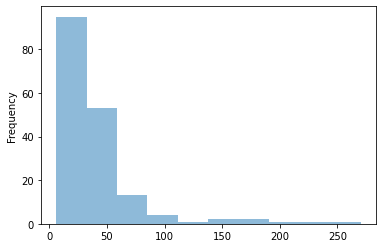

In [35]:
exp_data_clean.isin([0]).sum(axis='rows').plot.hist(alpha=0.5)

# Construct an all-to-all matrix to visualize correlations

In [37]:
#Spearman correlation of conditions
condition_corr = exp_data_clean.corr(method='spearman')
condition_corr.head()

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
fur__wt_fe__1,1.000000,0.996052,0.963706,0.963485,0.920567,0.919894,0.915651,0.913602,0.960286,0.961679,...,0.849489,0.850144,0.922285,0.930598,0.932191,0.938081,0.938491,0.941269,0.929753,0.922834
fur__wt_fe__2,0.996052,1.000000,0.962703,0.962414,0.922900,0.922577,0.918324,0.916052,0.960037,0.961047,...,0.846393,0.846562,0.919817,0.927784,0.927515,0.933182,0.933412,0.936131,0.928705,0.920489
fur__delfur_fe2__1,0.963706,0.962703,1.000000,0.996905,0.912404,0.912958,0.904385,0.902055,0.950829,0.951698,...,0.834489,0.833750,0.888814,0.901731,0.940483,0.943393,0.945141,0.946351,0.904708,0.903937
fur__delfur_fe2__2,0.963485,0.962414,0.996905,1.000000,0.911173,0.911780,0.902446,0.899954,0.950618,0.951611,...,0.831461,0.830588,0.885028,0.897943,0.937434,0.941021,0.943259,0.944290,0.901277,0.900799
omics__bw_ac__1,0.920567,0.922900,0.912404,0.911173,1.000000,0.995248,0.966034,0.964484,0.939546,0.940523,...,0.815925,0.815722,0.873928,0.878444,0.880243,0.885515,0.882385,0.883436,0.870208,0.864737


In [36]:
#Check scatterplot of different conditions (highest and lowest) (walk before you can run)

In [162]:
condition_corr.min()

fur__wt_fe__1                  0.728930
fur__wt_fe__2                  0.730000
fur__delfur_fe2__1             0.717487
fur__delfur_fe2__2             0.715055
omics__bw_ac__1                0.787213
                                 ...   
efeU__menFentCubiC_ale36__2    0.731465
efeU__menFentCubiC_ale37__1    0.724201
efeU__menFentCubiC_ale37__2    0.726791
efeU__menFentCubiC_ale38__1    0.693817
efeU__menFentCubiC_ale38__2    0.683476
Length: 173, dtype: float64

In [177]:
condition_corr[condition_corr['efeU__menFentCubiC_ale38__2'] < 0.8]

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
rpoB__wt_lb__1,0.808811,0.806936,0.791315,0.787385,0.853379,0.849588,0.801851,0.802896,0.789450,0.791850,...,0.757538,0.760933,0.786648,0.795737,0.811225,0.808204,0.795491,0.799154,0.763775,0.762118
rpoB__wt_lb__2,0.810946,0.809459,0.793716,0.789959,0.856878,0.853344,0.805404,0.806863,0.792693,0.794793,...,0.759531,0.762354,0.788308,0.797744,0.813190,0.810393,0.797508,0.801409,0.766223,0.764387
rpoB__rpoBE546V_lb__1,0.829165,0.827005,0.806444,0.801722,0.860250,0.856242,0.832614,0.833718,0.818346,0.820528,...,0.788316,0.792737,0.834067,0.843406,0.832403,0.830164,0.810825,0.814207,0.798113,0.799658
ssw__wt_glyc__1,0.832452,0.834134,0.793963,0.794050,0.843494,0.843401,0.833723,0.832098,0.823756,0.824369,...,0.845204,0.845335,0.810387,0.817887,0.790912,0.796969,0.792764,0.796625,0.802129,0.794631
ica__cytd_rib__1,0.733403,0.734304,0.723765,0.721362,0.829284,0.826583,0.795208,0.794789,0.732977,0.734745,...,0.705915,0.706637,0.708908,0.710115,0.735945,0.736399,0.728606,0.731124,0.698297,0.689301
ica__cytd_rib__2,0.728930,0.730000,0.717487,0.715055,0.824028,0.821341,0.786589,0.786759,0.727231,0.728884,...,0.699341,0.700981,0.704324,0.704455,0.731248,0.731465,0.724201,0.726791,0.693817,0.683476
ica__gth__2,0.844945,0.841930,0.862101,0.863669,0.809686,0.809227,0.795865,0.793082,0.855322,0.857469,...,0.770348,0.772856,0.774730,0.785839,0.834721,0.837228,0.834398,0.835937,0.797347,0.796703
pal__tartr_ale26_f10__2,0.854600,0.854755,0.843314,0.845606,0.899683,0.898521,0.856789,0.855615,0.845673,0.847175,...,0.776063,0.777994,0.794364,0.802399,0.822720,0.828473,0.822212,0.822840,0.787787,0.785764
pal__tartr_ale28_f10__1,0.854634,0.854790,0.854127,0.857322,0.897975,0.896815,0.843002,0.841479,0.848021,0.849488,...,0.756286,0.757130,0.770743,0.779049,0.817781,0.820538,0.820122,0.821224,0.771198,0.766581
pal__tartr_ale28_f10__2,0.855186,0.855816,0.853092,0.856490,0.902096,0.901285,0.852134,0.850788,0.857003,0.858286,...,0.762610,0.762839,0.776903,0.784523,0.820359,0.824136,0.821979,0.823754,0.777114,0.773119


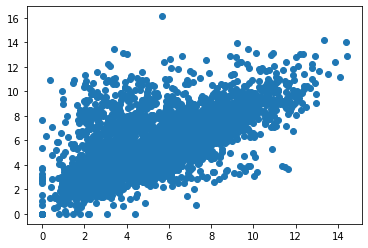

In [165]:
#Weakest correlation between conditions
fig, ax = plt.subplots()
ax.scatter(exp_data_clean['efeU__menFentCubiC_ale38__2'], exp_data_clean['ica__cytd_rib__2'])

In [181]:
condition_corr[condition_corr < 0.99].max()

fur__wt_fe__1                  0.975231
fur__wt_fe__2                  0.973885
fur__delfur_fe2__1             0.964015
fur__delfur_fe2__2             0.963485
omics__bw_ac__1                0.970197
                                 ...   
efeU__menFentCubiC_ale36__2    0.986008
efeU__menFentCubiC_ale37__1    0.985681
efeU__menFentCubiC_ale37__2    0.986008
efeU__menFentCubiC_ale38__1    0.952959
efeU__menFentCubiC_ale38__2    0.956239
Length: 173, dtype: float64

In [184]:
condition_corr[condition_corr['fur__wt_fe__1'] > 0.97]

,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_fe2__1,fur__delfur_fe2__2,omics__bw_ac__1,omics__bw_ac__2,omics__bw_fum__1,omics__bw_fum__2,omics__bw_glc__1,omics__bw_glc__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
fur__wt_fe__1,1.000000,0.996052,0.963706,0.963485,0.920567,0.919894,0.915651,0.913602,0.960286,0.961679,...,0.849489,0.850144,0.922285,0.930598,0.932191,0.938081,0.938491,0.941269,0.929753,0.922834
fur__wt_fe__2,0.996052,1.000000,0.962703,0.962414,0.922900,0.922577,0.918324,0.916052,0.960037,0.961047,...,0.846393,0.846562,0.919817,0.927784,0.927515,0.933182,0.933412,0.936131,0.928705,0.920489
rpoB__rpoBE546V_glc__1,0.975231,0.973885,0.947765,0.948075,0.905814,0.905691,0.916661,0.914533,0.951547,0.953110,...,0.855402,0.856026,0.929982,0.937961,0.920731,0.928233,0.925683,0.926839,0.926298,0.925649
ytf__delybaQ__1,0.972295,0.969412,0.956961,0.955584,0.922222,0.921059,0.917667,0.917125,0.962739,0.963978,...,0.866920,0.866624,0.941850,0.948558,0.962765,0.966733,0.965208,0.967087,0.947356,0.945354
ytf__delybaQ__2,0.971470,0.968675,0.955785,0.954864,0.922367,0.921553,0.917496,0.917396,0.962052,0.963177,...,0.866110,0.865374,0.941517,0.947094,0.961511,0.965545,0.964987,0.966937,0.947952,0.945498


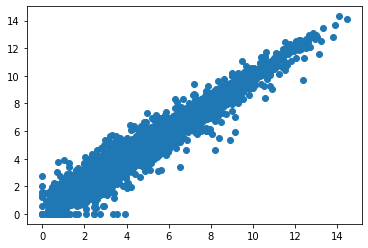

In [186]:
#Strongest correlation between conditions
fig, ax = plt.subplots()
ax.scatter(exp_data_clean['fur__wt_fe__1'], exp_data_clean['rpoB__rpoBE546V_glc__1'])

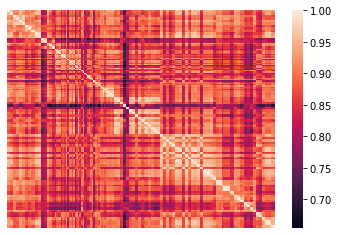

In [120]:
#Visualize conditions matrix
sns.heatmap(condition_corr, yticklabels=False, xticklabels=False)
plt.show()

In [38]:
#Transpose expression data
exp_data_t = exp_data_clean.T
#Spearman correlation of genes
gene_corr = exp_data_t.corr(method='spearman')
gene_corr.head()

log-TPM,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,1.000000,0.833219,0.792417,0.452448,0.328089,-0.274162,0.354155,-0.218883,-0.316809,-0.452935,...,0.054339,-0.280504,-0.079275,-0.190559,-0.349206,-0.325054,-0.169354,-0.266388,-0.398630,-0.372160
b0003,0.833219,1.000000,0.936773,0.631633,0.418504,-0.254969,0.363097,-0.234086,-0.232306,-0.404048,...,0.121378,-0.256556,-0.078908,-0.225927,-0.358028,-0.293774,-0.111783,-0.230079,-0.360714,-0.360932
b0004,0.792417,0.936773,1.000000,0.599018,0.470332,-0.273037,0.375596,-0.254340,-0.132237,-0.460987,...,0.213587,-0.262378,-0.186690,-0.325428,-0.417837,-0.307105,-0.158610,-0.238123,-0.365375,-0.406593
b0005,0.452448,0.631633,0.599018,1.000000,0.232865,-0.108515,0.211519,-0.041816,-0.014286,-0.183516,...,-0.073637,-0.255242,0.123314,0.077254,0.016256,0.091257,-0.273621,-0.367250,-0.295487,-0.001875
b0006,0.328089,0.418504,0.470332,0.232865,1.000000,-0.124340,0.409796,-0.276957,-0.103866,-0.245983,...,0.115190,-0.138900,-0.184315,-0.200579,-0.358639,-0.356473,-0.169123,-0.045418,-0.167158,-0.331368


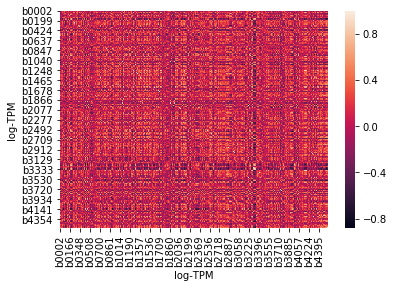

In [27]:
#Visualize genes matrix
sns.heatmap(gene_corr, yticklabels=False, xticklabels=False)
plt.show()

# Clustering

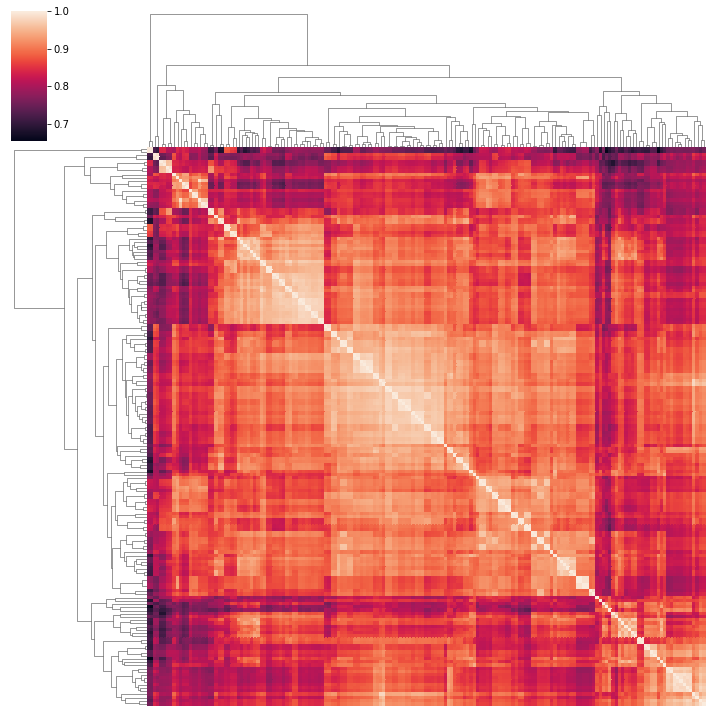

In [122]:
#Hierarchical clustering of condition correlations
sns.clustermap(condition_corr, yticklabels=False, xticklabels=False)

In [ ]:
#Importing required modules

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [142]:
#Transform the data
pca = PCA(2)
df = pca.fit_transform(condition_corr)
 
df.shape

(173, 2)

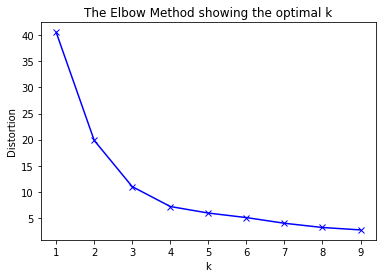

In [143]:
#Determine clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [144]:
#Initialize the class object
kmeans = KMeans(n_clusters = 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[3 3 3 3 1 1 1 1 3 3 1 3 1 1 1 1 1 1 3 3 3 3 4 4 2 2 3 1 1 2 2 0 3 3 3 0 0
 0 3 0 3 3 0 3 0 0 3 0 1 3 2 0 0 1 3 1 0 0 1 0 3 1 1 1 1 3 1 3 3 3 3 3 3 1
 1 4 4 2 2 1 1 3 3 0 0 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 0 0 0 0 3 3
 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1
 1 1 1 1 1 2 2 2 2 2 2 1 1 0 0 0 0 3 3 3 3 3 3 3 3]


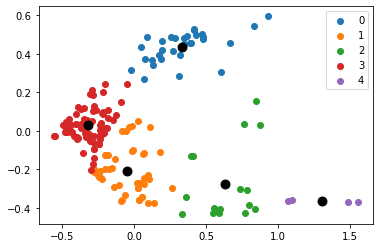

In [147]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='black')
plt.legend()
plt.show()

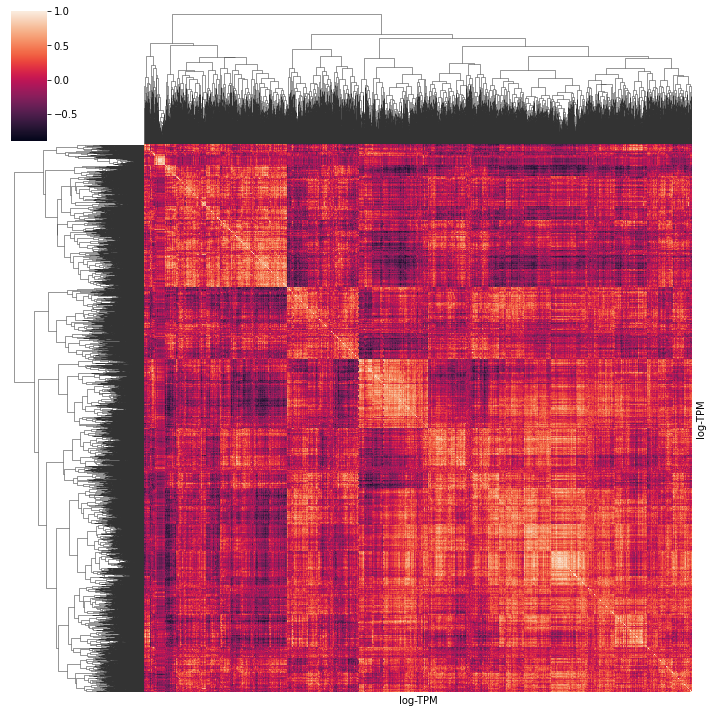

In [123]:
#Hierarchcal clustering of gene correlations
sns.clustermap(gene_corr, yticklabels=False, xticklabels=False)

In [148]:
#Transform the data
pca = PCA(2)
df = pca.fit_transform(gene_corr)
 
df.shape

(3923, 2)

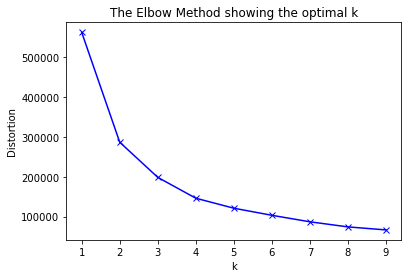

In [149]:
#Determine clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [150]:
#Initialize the class object
kmeans = KMeans(n_clusters = 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[3 3 3 ... 0 0 5]


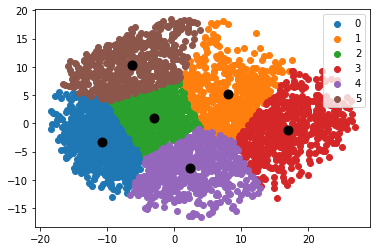

In [151]:
#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color='black')
plt.legend()
plt.show()